In [120]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, Activation
import datetime

In [121]:
df = pd.read_csv('005930.KS.csv')

In [122]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1220,2022-06-27,59000.0,59900.0,58300.0,58800.0,58800.0,18122236
1221,2022-06-28,59200.0,59500.0,58700.0,59400.0,59400.0,13540538
1222,2022-06-29,58500.0,58800.0,58000.0,58000.0,58000.0,14677138
1223,2022-06-30,57200.0,57600.0,57000.0,57000.0,57000.0,18915142
1224,2022-07-01,56900.0,57500.0,55900.0,56200.0,56200.0,24588886


In [164]:
high_price = df['High'].values
low_price = df['Low'].values
mid_price = (high_price + low_price) / 2 
seq = 50
seq_len = seq + 1 
result = []
for idx in range(len(mid_price) - seq_len):
    result.append(mid_price[index: index + seq_len])
# print(len(df)-len(result), result[0]) result 값 체크 
normalized_dataset = []
for items in result:
    normalized_value = [(x/items[0]) for x in items]
    normalized_dataset.append(normalized_value)
results = np.array(normalized_dataset)
row = int(round(results.shape[0]*0.9))
train = results[:row, ]
np.random.shuffle(train)
x_train = train[:, :-1]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = train[:, -1]
x_test = results[row:, :-1]
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_test = results[row:, -1]
print(x_train.shape, y_train.shape) # shape 값 체크

(1057, 50, 1) (1057,)


In [182]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (50, 1)))
model.add(LSTM(64, return_sequences = False))
model.add(Dense(1, activation = 'linear'))
model.compile(loss = 'mse', optimizer = 'rmsprop')
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_15 (LSTM)               (None, 50, 50)            10400     
_________________________________________________________________
lstm_16 (LSTM)               (None, 64)                29440     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 65        
Total params: 39,905
Trainable params: 39,905
Non-trainable params: 0
_________________________________________________________________


In [183]:
model.fit(x_train, y_train, 
          validation_data=(x_test, y_test),
          batch_size=10,
          epochs=20)

Epoch 1/20
106/106 [==============================] - 2s 10ms/step - loss: 0.0246 - val_loss: 7.4095e-04
Epoch 2/20
106/106 [==============================] - 1s 7ms/step - loss: 0.0072 - val_loss: 0.0075
Epoch 3/20
106/106 [==============================] - 1s 7ms/step - loss: 0.0051 - val_loss: 0.0040
Epoch 4/20
106/106 [==============================] - 1s 7ms/step - loss: 0.0041 - val_loss: 0.0011
Epoch 5/20
106/106 [==============================] - 1s 7ms/step - loss: 0.0032 - val_loss: 0.0029
Epoch 6/20
106/106 [==============================] - 1s 7ms/step - loss: 0.0028 - val_loss: 2.9667e-04
Epoch 7/20
106/106 [==============================] - 1s 7ms/step - loss: 0.0023 - val_loss: 2.6121e-04
Epoch 8/20
106/106 [==============================] - 1s 7ms/step - loss: 0.0023 - val_loss: 0.0018
Epoch 9/20
106/106 [==============================] - 1s 7ms/step - loss: 0.0020 - val_loss: 2.2282e-04
Epoch 10/20
106/106 [==============================] - 1s 7ms/step - loss: 0.0017 -

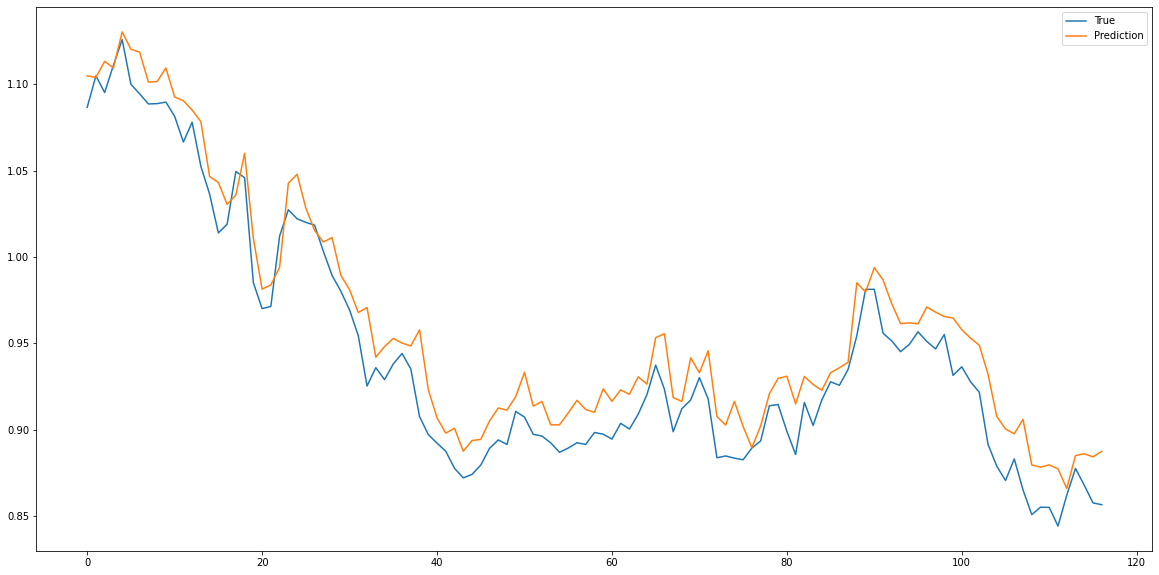

In [184]:
pred = model.predict(x_test)

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(y_test, label='True')
ax.plot(pred, label='Prediction')
ax.legend()
plt.show()